# Instructions

An example of Python code to compute the Black-Scholes formula for a European Call option was provided during the lectures. 
By definition, the **Greeks** of an option are the partial derivatives of the option price with respect to its parameters.
In the Black-Scholes model, the **Greeks** of the European Call option can be computed analytically. For example, using the same notations as in the lectures, the **Theta** of the European Call option, which is the partial derivative of the option price with respect to the time to maturity $T$, is given by
$${\Theta}_{\mathrm{Call}}=\frac{{\partial}\mathrm{Call}}{{\partial}T}=rKe^{-rT}\mathcal{N}(d_2)+\frac{{\sigma}S_0}{2\sqrt{T}}\mathcal{N}'(d_1)$$
where

$$d_1 = \frac{\log(S_0/K)+(r+\sigma^2/2)T}{\sigma\sqrt{T}}\ ,\hspace{10mm}d_2 = d_1-\sigma\sqrt{T}$$  
where $\mathcal{N}$ is the cumulative distribution function (CDF) of a standard Gaussian variable, and therefore $\mathcal{N}'$, the derivative of $\mathcal{N}$, is the probability distribution function (PDF) of a standard Gaussian variable. Note that we ignore the dividend yield parameter for this exercise.
<!-- solution file -->

### **Question 1**  &nbsp;&nbsp; (10 points)

a\) Write a Python function to compute the Theta of a European Call option in the Black-Scholes model.

b\) Write a Python program to plot this Theta between $T_{\min}=1/52$ (one week) and $T_{\max}=1$ (one year). Use the following option parameters:
```
S0 = 20.0
K = 20.0
sigma = 0.35
r = 0.05
```

In [1]:
import numpy as np
from scipy.stats import norm # needed for the Black-Scholes formulas

### Black-Scholes price of a European Call option
### This function was provided during the lectures
def BS_CALL(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r*T)* norm.cdf(d2)
    

In [2]:
### Question 1a ###

# Here is a Python function to compute the Theta of a European Call option in the Black-Scholes model:
### Black-Scholes theta of a European Call option
def BS_THETA(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma* np.sqrt(T)
    return r*K*np.exp(-r*T)*norm.cdf(d2) + sigma*S*norm.pdf(d1)/(2.0*np.sqrt(T))
    

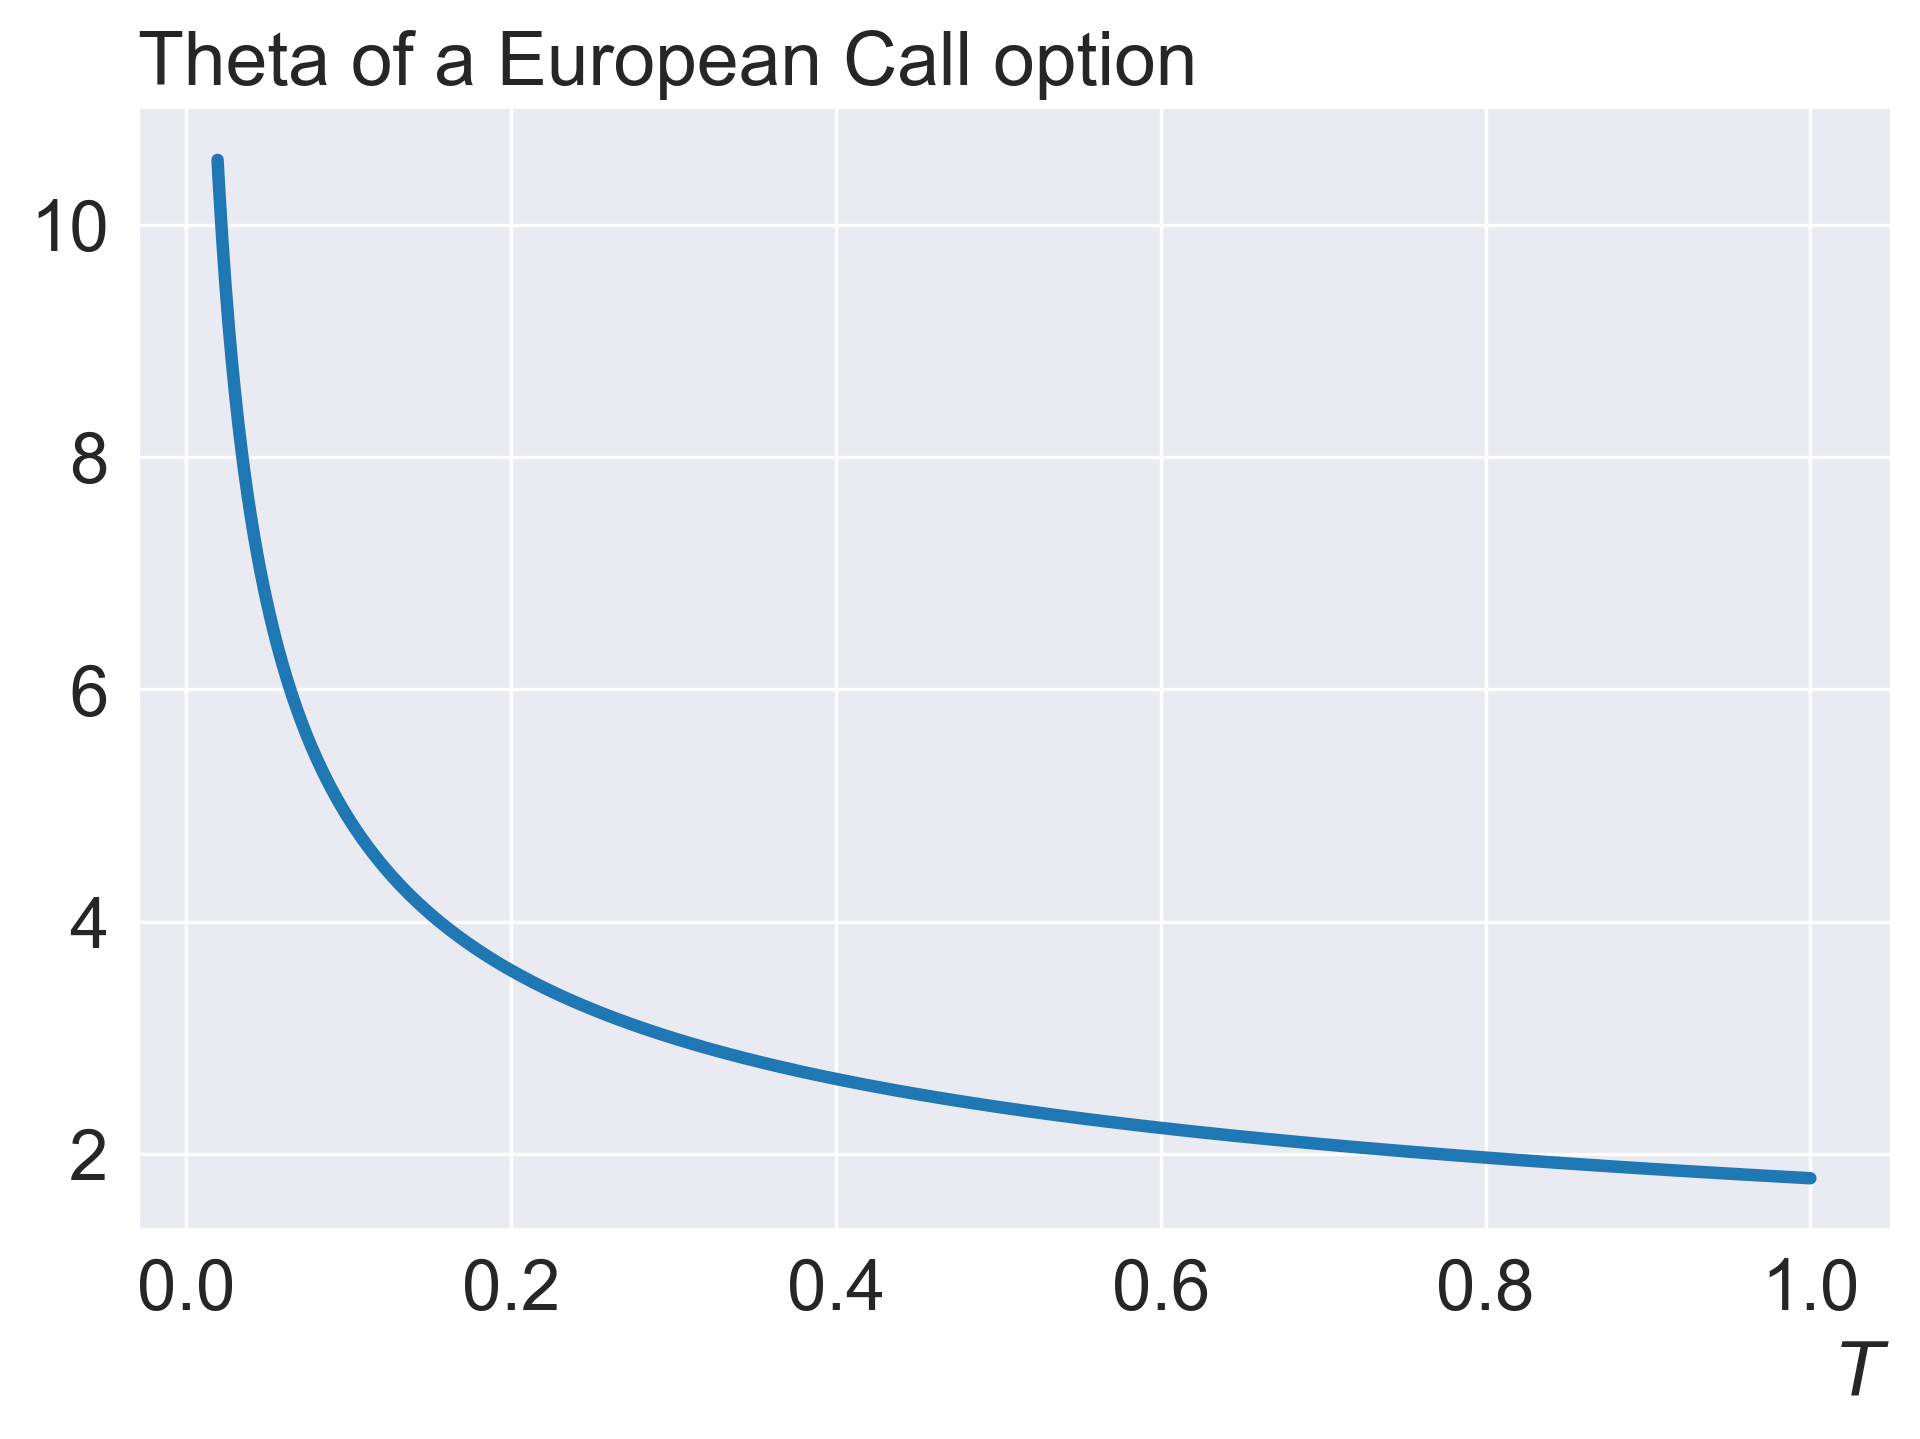

In [21]:
### Question 1b ###

# Here is a piece of code to compute and plot Theta between Tmin=1/12 and Tmax=1.
# The following parameter values are provided in the question
S0 = 20.0
K = 20.0
sigma = 0.35
r = 0.05

# This defines a grid for the maturity T, and computes the Black-Scholes Theta for each T:
Tmin, Tmax = 1/52, 1
T_grid = np.linspace(Tmin, Tmax, 1001) # The number of points 1001 is arbitrary here
theta = BS_THETA(S0,K,T_grid,r,sigma)

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.dpi': 300,'font.size': 18, 'axes.labelsize': 18, 'legend.fontsize': 17,
'axes.titlesize': 18, 'xtick.labelsize': 17, 'ytick.labelsize': 17}) # optional: updating font sizes and dpi
sns.set_style("darkgrid") # optional: grid style

fig = plt.figure()
ax = fig.add_subplot()
sns.lineplot(x=T_grid, y=theta, linewidth=3, ax=ax) # plots Theta w.r.t. T
sns.despine()
ax.set_title('Theta of a European Call option', loc='left')
ax.set_xlabel('$T$', loc='right')
fig.tight_layout(pad=0.4)
plt.show()

### **Question 2**  &nbsp;&nbsp; (10 points)

Since $\Theta$ is a partial derivative of an analytical formula (the Black-Scholes European Call option price), another way to estimate it is to use a finite-difference scheme. 
Implement a *forward-difference scheme* on the European Call option price to estimate its Theta. Use the following array for the values of $T$
```
Tmin, Tmax = 1/52, 1
T_grid = np.linspace(Tmin, Tmax, N+1)
```
where $N$ takes the following values: 8, 32, 128, 512. The other parameters are the same as in Question 1. Plot the resulting approximated Theta curves with respect to $T$. 

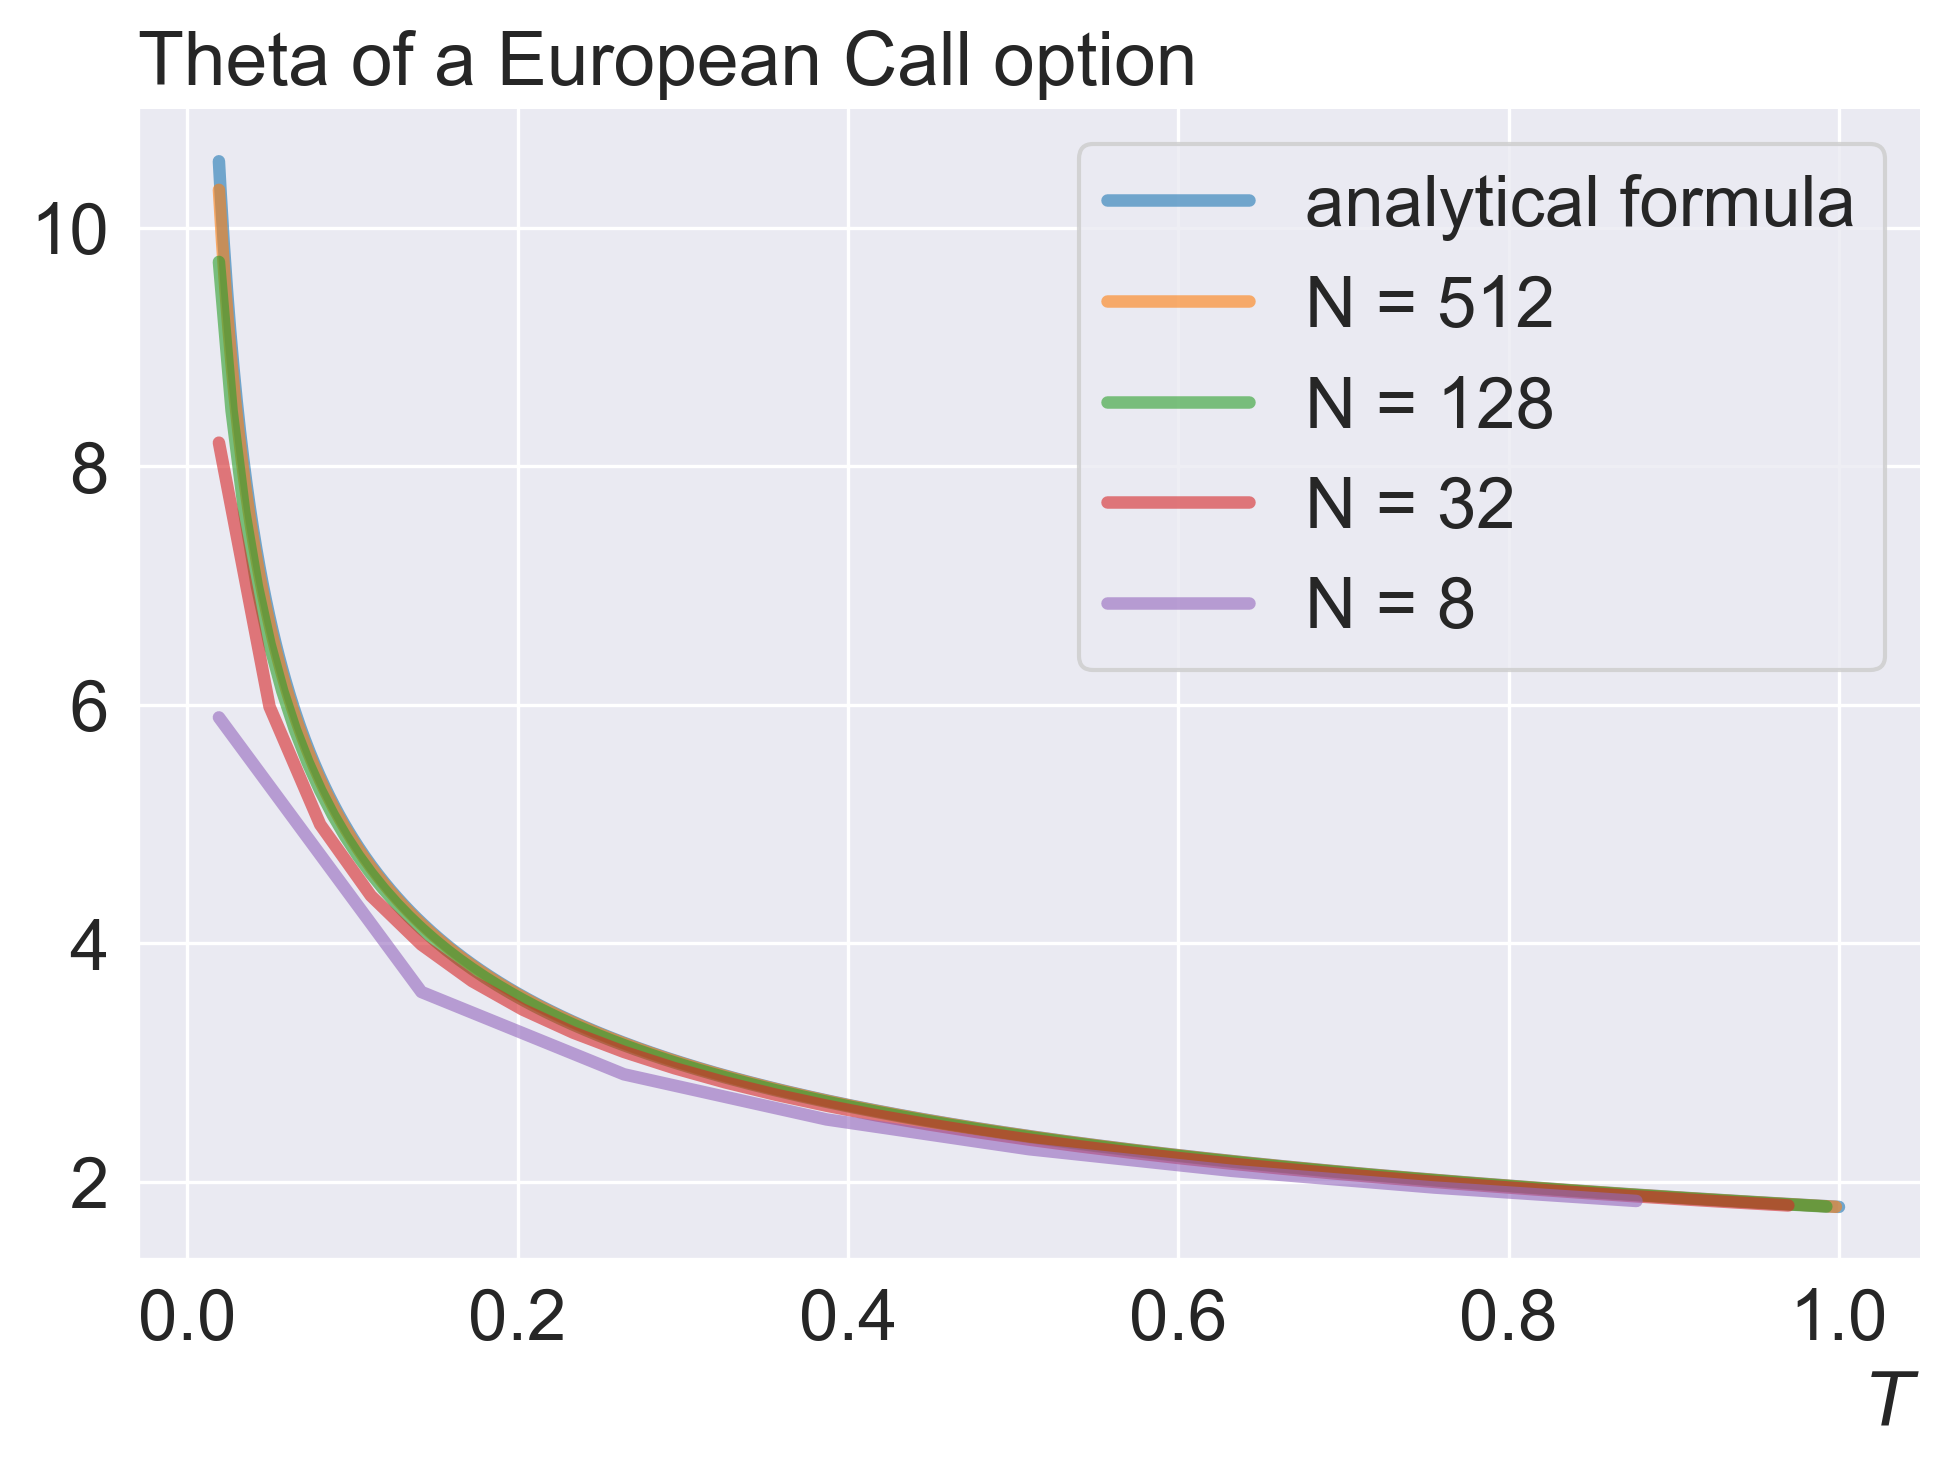

In [38]:
### Question 2 ###

# This plots the analytical Theta and the forward-difference approximations for different values of N on the same figure
fig = plt.figure() # create a figure
ax = fig.add_subplot() # create one subplot for this figure
Tmin, Tmax = 1/52, 1 # maturity range (same as before)

# Plotting the analytical theta formula (the code is the same as before)
N = 1000
T_grid = np.linspace(Tmin, Tmax, N+1)
theta = BS_THETA(S0,K,T_grid,r,sigma)
sns.lineplot(x=T_grid, y=theta, label='analytical formula', linewidth=3, alpha=0.6, ax=ax)

# Plotting the forward-difference approximations for different values of N
for N in np.flipud(np.array([8,32,128,512])): # These are the values of N considered
    T_grid = np.linspace(Tmin, Tmax, N+1) # linspace of N points between Tmin and Tmax
    dT = T_grid[1] - T_grid[0] # T_grid is a uniform grid, so this is one way to compute the mesh dT
    # same as dT = (Tmax-Tmin)/N
    price = BS_CALL(S0, K, T_grid, r, sigma) # analytical BS price for each T in T_grid
    forward_difference = (price[1:]-price[:-1])/dT # forward-difference scheme w.r.t. T
    # plot of forward-difference estimation of Theta for the current choice of N
    sns.lineplot(x=T_grid[:-1], y=forward_difference, label='N = '+str(N), linewidth=3, alpha=0.6, ax=ax)
        
# Optional cosmetic adjustments of the figure
sns.despine()
ax.set_title('Theta of a European Call option', loc='left')
ax.set_xlabel('$T$', loc='right')
fig.tight_layout(pad=0.2)
plt.savefig('theta_forward_difference.png')
plt.show()

### **Question 3**  &nbsp;&nbsp; (10 points)

a\) Write a Python program to find the value of $N$ such that the *absolute error* between the analytical $\Theta$ and the forward-difference approximation of $\Theta$ at $T=T_{\min}=1/52$ becomes lower than $10^{-2}$. 

b\) What is the corresponding value of the forward-difference mesh size $\Delta_T$ for such an $N$?  
<!-- solution file -->

In [25]:
### Question 3 ###

# The forward-difference approximation is worst at T=Tmin
# It can be decreased by increasing N (for 1/N far from np.spacing(1))
Tmin, T = 1/52, 1 # same maturity range as before
theta = BS_THETA(S0,K,Tmin,r,sigma) # analytical theta at T=Tmin

N = 0
target = 0.01
error_above_target = True
# keep looping as long as the error is above the target
while (error_above_target):
    N+=1 # we keep increasing N until the absolute error is smaller than the target
    T_grid = np.linspace(Tmin, Tmax, N+1)
    dT = T_grid[1] - T_grid[0] # mesh dT for the current choice of N
    # we only need the first two analytical prices for T=Tmin and T=Tmin+dT
    price = BS_CALL(S0, K, T_grid[:2], r, sigma)
    forward_difference = (price[1]-price[0])/dT # forward-difference scheme at T=Tmin
    error = np.abs(forward_difference-theta)  # absolute error for current value of N
    error_above_target = (error>target)
    

In [26]:
# Here N is the smallest integer such that the absolute error between the analytical Theta 
# and the forward-difference approximation of Theta at T=Tmin=1/52 is lower than 0.01
# This value of N is N=12829
# The corresponding value of dT is (Tmax-Tmin)/N = 7.644939050348668e-05
print("The optimal N is equal to",N)
print("The optimal value of dT is equal to",(Tmax-Tmin)/N)
print("The absolute error for this value of N is equal to",error)


The optimal N is equal to 12829
The optimal value of dT is equal to 7.644939050348668e-05
The absolute error for this value of N is equal to 0.009999420068171005
